In [52]:
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

0 [0.28554181 0.50286937 0.04282317]
1 [0.38606867 0.48805945 0.02706443]
2 [0.39720872 0.51278509 0.01070807]
3 [0.30497086 0.49821001 0.04502331]
4 [0.27252583 0.49752082 0.00589732]
6 [0.43929909 0.52122172 0.00081063]
7 [0.30004341 0.48064247 0.01362012]
8 [0.41906507 0.50185628 0.04675871]
9 [0.31134496 0.48234611 0.0046561 ]
10 [0.33646806 0.52096984 0.04501929]
11 [0.43864034 0.48346655 0.01704728]
12 [0.33494599 0.48460935 0.02823738]
13 [0.39544317 0.48071587 0.02829262]
14 [0.26042922 0.49427504 0.04114512]
15 [0.38606011 0.52268744 0.00235564]
16 [0.37196727 0.49135865 0.02489172]
17 [0.41115446 0.49923611 0.04714518]
18 [0.42473252 0.48049033 0.03726676]
19 [0.35283624 0.50694361 0.04873398]
20 [0.26953514 0.48182031 0.01127212]
21 [0.37672419 0.51287237 0.04911326]
22 [0.3470243  0.50266273 0.017332  ]
23 [0.29404626 0.4780865  0.02811462]
24 [0.29193267 0.5054606  0.02586432]
25 [0.42389726 0.50324711 0.009347  ]
26 [0.3052728  0.51913736 0.03636924]
27 [0.30210773 0.4984

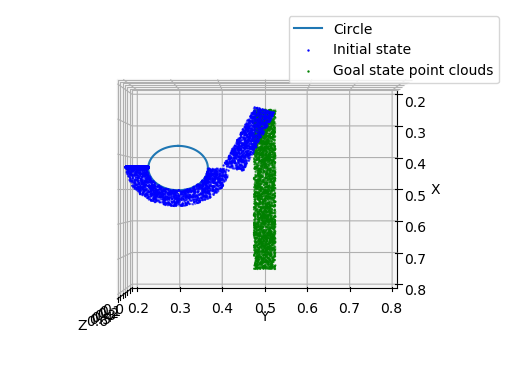

Visualizing goal state pattern 2:


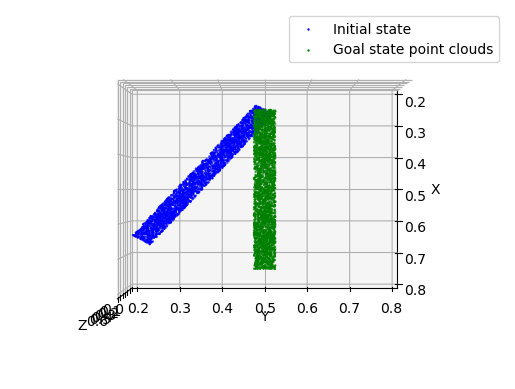

Visualizing goal state pattern 3:


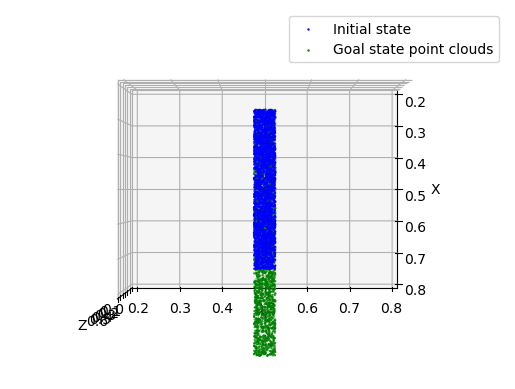

In [53]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range of the initial state of the rope
x_range = [0.25, 0.75]
y_range = [0.475, 0.525]
z_range = [0, 0.05]
stick_radius = 0.07

# Calculate the initial state points of the rope
NUM_POINTS = 3000
width = [x_range[1] - x_range[0], y_range[1] - y_range[0], z_range[1] - z_range[0]]
init_pos = [(x_range[0]+x_range[1])/2, (y_range[0]+y_range[1])/2, (z_range[0]+z_range[1])/2]
rope_initial_state = (np.random.random((NUM_POINTS, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)
rope_length = x_range[1] - x_range[0]

def sample_point_in_circle(angle):
    angle_radians = math.radians(angle)
    center = [x_range[0], (y_range[0] + y_range[1]) / 2]
    radius = 0.6 * rope_length
    r = math.sqrt(random.uniform(0, radius**2))  # Use the square root to maintain uniform distribution
    x = center[0] + r * math.cos(angle_radians)
    y = center[1] + r * math.sin(angle_radians)
    return np.array([x, y, 0])

def closest_tangent_point(add_stick_pos):
    center = [x_range[0], (y_range[0] + y_range[1]) / 2]
    l = stick_radius + (y_range[1] - y_range[0])/2
    X = add_stick_pos[0]
    Y = add_stick_pos[1]
    x = center[0]
    y = center[1]

    def points_of_tangency():
        distance = math.sqrt((X - x)**2 + (Y - y)**2)

        if distance <= l:
            return None

        ratio = l / distance
        M_x = X + (x - X) * ratio
        M_y = Y + (y - Y) * ratio

        d = math.sqrt(l**2 - (l * ratio)**2)
        perpendicular_x = (Y - y)
        perpendicular_y = -(X - x)

        norm = math.sqrt(perpendicular_x**2 + perpendicular_y**2)
        perpendicular_x /= norm
        perpendicular_y /= norm

        T1_x = M_x + d * perpendicular_x
        T1_y = M_y + d * perpendicular_y

        T2_x = M_x - d * perpendicular_x
        T2_y = M_y - d * perpendicular_y

        return (T1_x, T1_y), (T2_x, T2_y)

    tangent_points = points_of_tangency()
    if tangent_points is None:
        return None

    T1, T2 = tangent_points

    if abs(T1[1] - y) < abs(T2[1] - y):
        return T1
    else:
        return T2

def goal_state_pattern1(tangent_point, add_stick_pos):
    # rope1
    rope1_length = math.sqrt((x_range[0] - tangent_point[0])**2 + ((y_range[0] + y_range[1]) / 2 - tangent_point[1])**2)
    width = [rope1_length, y_range[1] - y_range[0], z_range[1] - z_range[0]]
    init_pos = [x_range[0]+rope1_length/2, (y_range[0]+y_range[1])/2, (z_range[0]+z_range[1])/2]
    rope1_num_points = int(NUM_POINTS/rope_length*rope1_length)
    rope1_state = (np.random.random((rope1_num_points, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)
    angle_radians = math.atan2(tangent_point[1] - (y_range[0] + y_range[1]) / 2, tangent_point[0] - x_range[0])

    pivot_point = np.array([x_range[0], (y_range[0] + y_range[1]) / 2, (z_range[0] + z_range[1]) / 2])
    rotated_rope1 = np.zeros((rope1_num_points, 3))

    for i in range(rope1_num_points):
        point = rope1_state[i] - pivot_point
        rotated_x = point[0] * math.cos(angle_radians) - point[1] * math.sin(angle_radians)
        rotated_y = point[0] * math.sin(angle_radians) + point[1] * math.cos(angle_radians)
        if rotated_y < 0:
            print(i, rope1_state[i])
        rotated_rope1[i] = np.array([rotated_x, rotated_y, point[2]]) + pivot_point
    
    # rope2
    if add_stick_pos[1] > 0.5:
        rope2_pos = add_stick_pos + np.array([0, stick_radius + (y_range[1] - y_range[0])/2, 0])
    else:
        rope2_pos = add_stick_pos - np.array([0, stick_radius + (y_range[1] - y_range[0])/2, 0])
    radius = stick_radius + (y_range[1] - y_range[0])/2
    angle1 = math.atan2(tangent_point[1] - add_stick_pos[1], tangent_point[0] - add_stick_pos[0])
    angle2 = math.atan2(rope2_pos[1] - add_stick_pos[1], rope2_pos[0] - add_stick_pos[0])
    delta_angle = angle2 - angle1

    if abs(delta_angle) > math.pi:
        delta_angle += math.copysign(2 * math.pi, -delta_angle)
    
    if delta_angle > 0 and add_stick_pos[1] < 0.5:
        delta_angle -= 2 * math.pi
    if delta_angle < 0 and add_stick_pos[1] > 0.5:
        delta_angle += 2 * math.pi
    
    arc_length = abs(radius * delta_angle)
    rope2_num_points = int(NUM_POINTS/rope_length*arc_length)
    
    points_on_arc = []
    points_around_arc = []

    for _ in range(rope2_num_points):
        t = random.uniform(0, delta_angle)
        
        x_on_arc = add_stick_pos[0] + radius * math.cos(angle1 + t)
        y_on_arc = add_stick_pos[1] + radius * math.sin(angle1 + t)
        z_on_arc = random.uniform(z_range[0], z_range[1])
        points_on_arc.append((x_on_arc, y_on_arc, z_on_arc))
        
        r = radius + random.uniform(-(y_range[1] - y_range[0])/2, (y_range[1] - y_range[0])/2)
        x_around_arc = add_stick_pos[0] + r * math.cos(angle1 + t)
        y_around_arc = add_stick_pos[1] + r * math.sin(angle1 + t)
        z_around_arc = random.uniform(z_range[0], z_range[1])
        points_around_arc.append((x_around_arc, y_around_arc, z_around_arc))
    rope2_points = np.array(points_around_arc)

    # rope3
    rest_rope_length = rope_length - rope1_length - arc_length
    width = [rest_rope_length, y_range[1] - y_range[0], z_range[1] - z_range[0]]
    init_pos = [rope2_pos[0]-rest_rope_length/2, rope2_pos[1], (z_range[0]+z_range[1])/2]
    rope3_num_points = int(NUM_POINTS/rest_rope_length*rope1_length)
    rope3_state = (np.random.random((rope3_num_points, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)

    return np.concatenate([rotated_rope1, rope2_points, rope3_state])

def goal_state_pattern2(angle):
    angle_radians = math.radians(angle)
    pivot_point = np.array([x_range[0], (y_range[0] + y_range[1]) / 2, (z_range[0] + z_range[1]) / 2])
    rotated_rope = np.zeros((NUM_POINTS, 3))

    for i in range(NUM_POINTS):
        point = rope_initial_state[i] - pivot_point
        rotated_x = point[0] * math.cos(angle_radians) - point[1] * math.sin(angle_radians)
        rotated_y = point[0] * math.sin(angle_radians) + point[1] * math.cos(angle_radians)
        rotated_rope[i] = np.array([rotated_x, rotated_y, point[2]]) + pivot_point

    return rotated_rope

def goal_state_pattern3(extension_ratio):
    x_range[1] *= extension_ratio

    width = [x_range[1] - x_range[0], y_range[1] - y_range[0], (z_range[1] - z_range[0])*(1/extension_ratio)]
    init_pos = [(x_range[0]+x_range[1])/2, (y_range[0]+y_range[1])/2, (z_range[0]+z_range[1])/2]

    goal_state = (np.random.random((NUM_POINTS, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)
    return goal_state

def visualize_goal_state(initial_state, goal_state, add_stick=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if add_stick is not None:
        # Visualize the sampled point and the circle
        theta = np.linspace(-math.pi, math.pi, 100)
        circle_x = add_stick[0] + stick_radius * np.cos(theta)
        circle_y = add_stick[1] + stick_radius * np.sin(theta)
        plt.plot(circle_x, circle_y, label='Circle')

    ax.scatter(initial_state[:, 0], initial_state[:, 1], initial_state[:, 2], c='blue', s=0.5, label='Initial state')
    ax.scatter(goal_state[:, 0], goal_state[:, 1], goal_state[:, 2], c='green', s=0.5, label='Goal state point clouds')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(0.2, 0.8)
    ax.set_ylim(0.2, 0.8)
    ax.set_zlim(0, 0.6)
    ax.view_init(90, 0)

    plt.legend()
    plt.show()

angle_ranges = [(-70, -30), (30, 70)]
selected_range = random.choice(angle_ranges)
stick_angle = random.uniform(selected_range[0], selected_range[1])
add_stick_pos = sample_point_in_circle(stick_angle)
tangent_point = closest_tangent_point(add_stick_pos)
goal_state1 = goal_state_pattern1(tangent_point, add_stick_pos)

angle_ranges = [(-90, -30), (30, 90)]
selected_range = random.choice(angle_ranges)
rot_angle = random.uniform(selected_range[0], selected_range[1])
goal_state2 = goal_state_pattern2(rot_angle)

extension_ratio = random.uniform(1.1, 1.5)
goal_state3 = goal_state_pattern3(extension_ratio)

print("Visualizing goal state pattern 1:")
visualize_goal_state(goal_state1, rope_initial_state, add_stick_pos)

print("Visualizing goal state pattern 2:")
visualize_goal_state(goal_state2, rope_initial_state)

print("Visualizing goal state pattern 3:")
visualize_goal_state(rope_initial_state, goal_state3, )

35.530510598743106
(0.4950733990769535, 0.5656826930780272) [0.47048018 0.6574442  0.        ]
rope1_num_points 2537
rope2_num_points 2735
Visualizing goal state pattern 1:


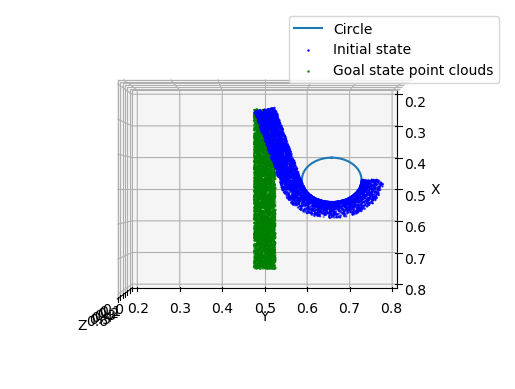

In [72]:
# Define the range of the initial state of the rope
x_range = [0.25, 0.75]
y_range = [0.475, 0.525]
z_range = [0, 0.05]
stick_radius = 0.07

# Calculate the initial state points of the rope
NUM_POINTS = 5000
width = [x_range[1] - x_range[0], y_range[1] - y_range[0], z_range[1] - z_range[0]]
init_pos = [(x_range[0]+x_range[1])/2, (y_range[0]+y_range[1])/2, (z_range[0]+z_range[1])/2]
rope_initial_state = (np.random.random((NUM_POINTS, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)
rope_length = x_range[1] - x_range[0]

def closest_tangent_point(angle):
    # stick pos
    angle_radians = math.radians(angle)
    center = [x_range[0], (y_range[0] + y_range[1]) / 2]
    radius = 0.6 * rope_length
    r = math.sqrt(random.uniform((radius**2)/6, radius**2))  # Use the square root to maintain uniform distribution
    X = center[0] + r * math.cos(angle_radians)
    Y = center[1] + r * math.sin(angle_radians)
    stick_pos = np.array([X, Y, 0])

    # tarngent pos
    radius = stick_radius + (y_range[1] - y_range[0])/2
    x = center[0]
    y = center[1]

    distance = math.sqrt((X - x)**2 + (Y - y)**2)
    theta = math.acos(radius / distance)
    theta_a = math.pi/2 - theta
    d = math.sqrt(distance**2 - radius**2)
    if angle > 0:
        theta_b = angle_radians - theta_a
        T1_x = x + d * math.cos(theta_b)
        T1_y = y + d * math.sin(theta_b)
    else:
        theta_b = angle_radians + theta_a
        T1_x = x + d * math.cos(theta_b)
        T1_y = y + d * math.sin(theta_b)

    return (T1_x, T1_y), stick_pos

def goal_state_pattern1(tangent_point, add_stick_pos):
    # rope1
    rope1_length = math.sqrt((x_range[0] - tangent_point[0])**2 + ((y_range[0] + y_range[1]) / 2 - tangent_point[1])**2)
    width = [rope1_length, y_range[1] - y_range[0], z_range[1] - z_range[0]]
    init_pos = [x_range[0]+rope1_length/2, (y_range[0]+y_range[1])/2, (z_range[0]+z_range[1])/2]
    rope1_num_points = int(NUM_POINTS/rope_length*rope1_length)
    print('rope1_num_points', rope1_num_points)
    rope1_state = (np.random.random((rope1_num_points, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)
    angle_radians = math.atan2(tangent_point[1] - (y_range[0] + y_range[1]) / 2, tangent_point[0] - x_range[0])

    pivot_point = np.array([x_range[0], (y_range[0] + y_range[1]) / 2, (z_range[0] + z_range[1]) / 2])
    rotated_rope1 = np.zeros((rope1_num_points, 3))

    for i in range(rope1_num_points):
        point = rope1_state[i] - pivot_point
        rotated_x = point[0] * math.cos(angle_radians) - point[1] * math.sin(angle_radians)
        rotated_y = point[0] * math.sin(angle_radians) + point[1] * math.cos(angle_radians)
        rotated_rope1[i] = np.array([rotated_x, rotated_y, point[2]]) + pivot_point
    
    # rope2
    if add_stick_pos[1] > 0.5:
        rope2_pos = add_stick_pos + np.array([0, stick_radius + (y_range[1] - y_range[0])/2, 0])
    else:
        rope2_pos = add_stick_pos - np.array([0, stick_radius + (y_range[1] - y_range[0])/2, 0])
    radius = stick_radius + (y_range[1] - y_range[0])/2
    angle1 = math.atan2(tangent_point[1] - add_stick_pos[1], tangent_point[0] - add_stick_pos[0])
    angle2 = math.atan2(rope2_pos[1] - add_stick_pos[1], rope2_pos[0] - add_stick_pos[0])
    delta_angle = angle2 - angle1

    if abs(delta_angle) > math.pi:
        delta_angle += math.copysign(2 * math.pi, -delta_angle)
    
    if delta_angle > 0 and add_stick_pos[1] < 0.5:
        delta_angle -= 2 * math.pi
    if delta_angle < 0 and add_stick_pos[1] > 0.5:
        delta_angle += 2 * math.pi
    
    arc_length = abs(radius * delta_angle)
    rope2_num_points = int(NUM_POINTS/rope_length*arc_length)
    
    
    points_on_arc = []
    points_around_arc = []

    for _ in range(rope2_num_points):
        t = random.uniform(0, delta_angle)
        
        x_on_arc = add_stick_pos[0] + radius * math.cos(angle1 + t)
        y_on_arc = add_stick_pos[1] + radius * math.sin(angle1 + t)
        z_on_arc = random.uniform(z_range[0], z_range[1])
        points_on_arc.append((x_on_arc, y_on_arc, z_on_arc))
        
        uniform_samples = np.random.uniform(0, 1)
        transformed_samples = uniform_samples ** 2
        A = -(y_range[1] - y_range[0])/2
        B = (y_range[1] - y_range[0])/2
        scaled_samples = transformed_samples * (B - A) + A
        r = radius + scaled_samples

        x_around_arc = add_stick_pos[0] + r * math.cos(angle1 + t)
        y_around_arc = add_stick_pos[1] + r * math.sin(angle1 + t)
        z_around_arc = random.uniform(z_range[0], z_range[1])
        points_around_arc.append((x_around_arc, y_around_arc, z_around_arc))
    rope2_points = np.array(points_around_arc)
    print('rope2_num_points', rope2_num_points)

    # rope3
    rest_rope_length = rope_length - rope1_length - arc_length

    if rest_rope_length > 0:
        width = [rest_rope_length, y_range[1] - y_range[0], z_range[1] - z_range[0]]
        init_pos = [rope2_pos[0]-rest_rope_length/2, rope2_pos[1], (z_range[0]+z_range[1])/2]
        rope3_num_points = int(NUM_POINTS/rope_length*rest_rope_length)
        rope3_state = (np.random.random((rope3_num_points, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)
        return np.concatenate([rotated_rope1, rope2_points, rope3_state])
    return np.concatenate([rotated_rope1, rope2_points])

def visualize_goal_state(initial_state, goal_state, add_stick=None, tangent_point=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if add_stick is not None:
        # Visualize the sampled point and the circle
        theta = np.linspace(-math.pi, math.pi, 100)
        circle_x = add_stick[0] + stick_radius * np.cos(theta)
        circle_y = add_stick[1] + stick_radius * np.sin(theta)
        plt.plot(circle_x, circle_y, label='Circle')
        ax.scatter(tangent_point[0], tangent_point[1])

    ax.scatter(initial_state[:, 0], initial_state[:, 1], initial_state[:, 2], c='blue', s=0.5, label='Initial state')
    ax.scatter(goal_state[:, 0], goal_state[:, 1], goal_state[:, 2], c='green', s=0.5, label='Goal state point clouds')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(0.2, 0.8)
    ax.set_ylim(0.2, 0.8)
    ax.set_zlim(0, 0.6)
    ax.view_init(90, 0)

    plt.legend()
    plt.show()

angle_ranges = [(35, 38)]
selected_range = random.choice(angle_ranges)
stick_angle = random.uniform(selected_range[0], selected_range[1])
print(stick_angle)
tangent_point, add_stick_pos = closest_tangent_point(stick_angle)
print(tangent_point, add_stick_pos)
goal_state1 = goal_state_pattern1(tangent_point, add_stick_pos)

# goal_state1 = np.load('/root/ExPCP/policy/pbm/goal_state/goal_state1/1/goal_state.npy')[:, [0, 2, 1]]
print("Visualizing goal state pattern 1:")
visualize_goal_state(goal_state1, rope_initial_state, add_stick_pos, tangent_point)


In [34]:
import pickle
import glob
import pandas as pd
import random
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from matplotlib.colors import Normalize

import matplotlib.pyplot as plt
import itertools
import json
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

cluster = 3
actions_time = 50

# Get the default color cycle from matplotlib
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Create a dictionary of integers and colors
color_dict = {i: color for i, color in zip(range(0, cluster), itertools.cycle(colors))}

path_list = glob.glob('/root/ExPCP/policy/pbm/experts/*/*')
mu_list = []
lam_list = []
yield_stress_list = []
x_list = []
y_list = []
pred = []
for path in path_list:
    with open(path, 'rb') as f:
        aaa = pickle.load(f)
        
    mu_list.append(aaa['mu'])
    lam_list.append(aaa['lam'])
    yield_stress_list.append(aaa['yield_stress'])

    version = path.split('/')[-2].split('-')[-1][1:]
    with open(f'/root/ExPCP/policy/pbm/goal_state/goal_state1/{version}/randam_value.txt', mode="r") as f:
        stick_pos = json.load(f)
    x_list.append(stick_pos['add_stick_x'])
    y_list.append(stick_pos['add_stick_y'])

# clsuter_array = np.array([mu_list]).reshape(-1, 1) 
# clsuter_array = np.array([mu_list, lam_list, yield_stress_list, x_list, y_list]).reshape(-1, 5)
# clsuter_array = np.array([mu_list, lam_list, yield_stress_list]).reshape(-1, 3)
# pred = KMeans(n_clusters=cluster).fit_predict(clsuter_array)

for i in range(cluster):
    print(f'category {i}', sum(pred == i))


fig = plt.figure(figsize=(8,8))
for i in range(len(path_list)):
    path = path_list[i]
    label = pred[i]
    with open(path, 'rb') as f:
        aaa = pickle.load(f)
    pca.fit(aaa['action'])
    pca_actions = pca.components_
    # plt.scatter(aaa['action'][:actions_time, 0], aaa['action'][:actions_time, 2], c=color_dict[label], s=0.1)
    # plt.scatter(aaa['action'][-actions_time:, 0], aaa['action'][-actions_time:, 2], c=color_dict[label], s=10)
    plt.scatter(pca_actions[0][0], pca_actions[0][2], c=color_dict[label], label=label, s=5)
plt.legend()


IsADirectoryError: [Errno 21] Is a directory: '/root/ExPCP/policy/pbm/experts/Pinch_100_2000_100_2000_100_2000/Pinch-v1'

In [5]:
import pickle
import glob
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from matplotlib.colors import Normalize

import matplotlib.pyplot as plt
import itertools
import json
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

actions_time = 50

# Get the default color cycle from matplotlib
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Create a dictionary of integers and colors
color_dict = {i: color for i, color in zip(range(0, cluster), itertools.cycle(colors))}

path_list = glob.glob('/root/ExPCP/policy/pbm/experts/*/*')
buffer = 500
fig = plt.figure(figsize=(8,8))
category_list = []
for i in range(len(path_list)):
    path = path_list[i]
    with open(path, 'rb') as f:
        aaa = pickle.load(f)
    mu = aaa['mu']
    lam = aaa['lam']
    yield_stress = aaa['yield_stress']
    if mu > 4000-buffer and lam > 4000-buffer:
        plt.scatter(aaa['action'][:actions_time, 0], aaa['action'][:actions_time, 2], c=color_dict[1], s=0.5)
        category_list.append(1)
    if mu < 500+buffer and lam < 500+buffer:
        plt.scatter(aaa['action'][:actions_time, 0], aaa['action'][:actions_time, 2], c=color_dict[0], s=0.5)
        category_list.append(0)
plt.legend()

print(sum(category_list))
print(len(category_list) - sum(category_list))


IsADirectoryError: [Errno 21] Is a directory: '/root/ExPCP/policy/pbm/experts/Move/Move-v136'

<Figure size 800x800 with 0 Axes>

In [57]:
import numpy as np
import matplotlib.pyplot as plt
aaa = np.load('/root/ExPCP/policy/pbm/plb/envs/assets/Move3D-v1.npy')
bbb = np.load('/root/ExPCP/policy/pbm/goal_state/goal_state1/2/goal_state.npy')

In [61]:
aaa.sum()

0.6103515624999999

In [60]:
aaa.sum(axis=1).sum(axis=1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

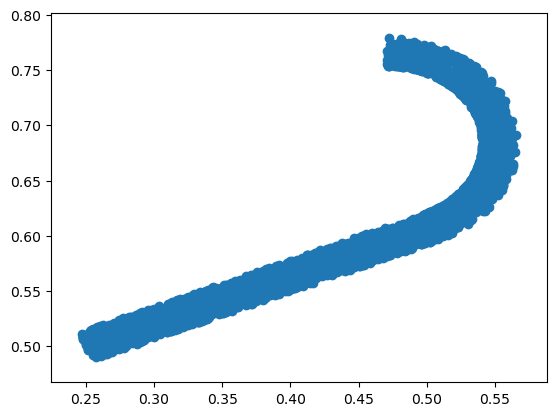

In [51]:
plt.scatter(bbb[:, 0], bbb[:, 2])

In [43]:
bbb.shape

(3007, 3)

In [45]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range of the initial state of the rope
x_range = [0.25, 0.75]
y_range = [0.4875, 0.5125]
z_range = [0, 0.025]
stick_radius = 0.07

# Calculate the initial state points of the rope
NUM_POINTS = 3000
width = [x_range[1] - x_range[0], y_range[1] - y_range[0], z_range[1] - z_range[0]]
init_pos = [(x_range[0]+x_range[1])/2, (y_range[0]+y_range[1])/2, (z_range[0]+z_range[1])/2]
rope_initial_state = (np.random.random((NUM_POINTS, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)
rope_length = x_range[1] - x_range[0]

def closest_tangent_point(angle):
    # stick pos
    angle_radians = math.radians(angle)
    center = [x_range[0], (y_range[0] + y_range[1]) / 2]
    radius = 0.6 * rope_length
    r = math.sqrt(random.uniform((radius**2)/8, radius**2))  # Use the square root to maintain uniform distribution
    X = center[0] + r * math.cos(angle_radians)
    Y = center[1] + r * math.sin(angle_radians)
    stick_pos = np.array([X, Y, 0])

    # tarngent pos
    radius = stick_radius + (y_range[1] - y_range[0])/2
    x = center[0]
    y = center[1]

    distance = math.sqrt((X - x)**2 + (Y - y)**2)
    theta = math.acos(radius / distance)
    theta_a = math.pi/2 - theta
    d = math.sqrt(distance**2 - radius**2)
    if angle > 0:
        theta_b = angle_radians - theta_a
        T1_x = x + d * math.cos(theta_b)
        T1_y = y + d * math.sin(theta_b)
    else:
        theta_b = angle_radians + theta_a
        T1_x = x + d * math.cos(theta_b)
        T1_y = y + d * math.sin(theta_b)

    return (T1_x, T1_y), stick_pos

def goal_state_pattern1(tangent_point, add_stick_pos):
    # rope1
    rope1_length = math.sqrt((x_range[0] - tangent_point[0])**2 + ((y_range[0] + y_range[1]) / 2 - tangent_point[1])**2)
    width = [rope1_length, y_range[1] - y_range[0], z_range[1] - z_range[0]]
    init_pos = [x_range[0]+rope1_length/2, (y_range[0]+y_range[1])/2, (z_range[0]+z_range[1])/2]
    rope1_num_points = int(NUM_POINTS/rope_length*rope1_length)
    rope1_state = (np.random.random((rope1_num_points, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)
    angle_radians = math.atan2(tangent_point[1] - (y_range[0] + y_range[1]) / 2, tangent_point[0] - x_range[0])

    pivot_point = np.array([x_range[0], (y_range[0] + y_range[1]) / 2, (z_range[0] + z_range[1]) / 2])
    rotated_rope1 = np.zeros((rope1_num_points, 3))

    for i in range(rope1_num_points):
        point = rope1_state[i] - pivot_point
        rotated_x = point[0] * math.cos(angle_radians) - point[1] * math.sin(angle_radians)
        rotated_y = point[0] * math.sin(angle_radians) + point[1] * math.cos(angle_radians)
        rotated_rope1[i] = np.array([rotated_x, rotated_y, point[2]]) + pivot_point
    
    # rope2
    if add_stick_pos[1] > 0.5:
        rope2_pos = add_stick_pos + np.array([0, stick_radius + (y_range[1] - y_range[0])/2, 0])
    else:
        rope2_pos = add_stick_pos - np.array([0, stick_radius + (y_range[1] - y_range[0])/2, 0])
    radius = stick_radius + (y_range[1] - y_range[0])/2
    angle1 = math.atan2(tangent_point[1] - add_stick_pos[1], tangent_point[0] - add_stick_pos[0])
    angle2 = math.atan2(rope2_pos[1] - add_stick_pos[1], rope2_pos[0] - add_stick_pos[0])
    delta_angle = angle2 - angle1

    if abs(delta_angle) > math.pi:
        delta_angle += math.copysign(2 * math.pi, -delta_angle)
    
    if delta_angle > 0 and add_stick_pos[1] < 0.5:
        delta_angle -= 2 * math.pi
    if delta_angle < 0 and add_stick_pos[1] > 0.5:
        delta_angle += 2 * math.pi
    
    arc_length = abs(radius * delta_angle)
    rope2_num_points = int(NUM_POINTS/rope_length*arc_length)
    
    points_on_arc = []
    points_around_arc = []

    for _ in range(rope2_num_points):
        t = random.uniform(0, delta_angle)
        
        x_on_arc = add_stick_pos[0] + radius * math.cos(angle1 + t)
        y_on_arc = add_stick_pos[1] + radius * math.sin(angle1 + t)
        z_on_arc = random.uniform(z_range[0], z_range[1])
        points_on_arc.append((x_on_arc, y_on_arc, z_on_arc))
        
        uniform_samples = np.random.uniform(0, 1)
        transformed_samples = uniform_samples ** 2
        A = -(y_range[1] - y_range[0])/2
        B = (y_range[1] - y_range[0])/2
        scaled_samples = transformed_samples * (B - A) + A
        r = radius + scaled_samples

        x_around_arc = add_stick_pos[0] + r * math.cos(angle1 + t)
        y_around_arc = add_stick_pos[1] + r * math.sin(angle1 + t)
        z_around_arc = random.uniform(z_range[0], z_range[1])
        points_around_arc.append((x_around_arc, y_around_arc, z_around_arc))
    rope2_points = np.array(points_around_arc)

    # rope3
    rest_rope_length = rope_length - rope1_length - arc_length
    if rest_rope_length > 0:
        print('over')
        width = [rest_rope_length, y_range[1] - y_range[0], z_range[1] - z_range[0]]
        init_pos = [rope2_pos[0]-rest_rope_length/2, rope2_pos[1], (z_range[0]+z_range[1])/2]
        rope3_num_points = int(NUM_POINTS/rope_length*rest_rope_length)
        rope3_state = (np.random.random((rope3_num_points, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)
        return np.concatenate([rotated_rope1, rope2_points, rope3_state])
    return np.concatenate([rotated_rope1, rope2_points])


angle_ranges = [(35, 45)]
selected_range = random.choice(angle_ranges)
stick_angle = random.uniform(selected_range[0], selected_range[1])
tangent_point, add_stick_pos = closest_tangent_point(stick_angle)
goal_state = goal_state_pattern1(tangent_point, add_stick_pos)
goal_state = goal_state[:, [0, 2, 1]]

over


In [1]:
import numpy as np

In [2]:
aaa = np.load('/home/robot_dev4/kuroki/UniDOM/ExPCP/policy/pbm/plb/envs/assets/Move3D-v1.npy')

In [3]:
aaa.sum()

0.18310546874999997